Detecting if a text was written in a natural language.

Jan Gruszczyński 145464 Information Technology Laboratories. Lab 5

In [2]:
import os
from math import log2
from matplotlib import pyplot as plt

In [7]:
def load_text_into_memory(file_name, file_folder):
    with open(f"{file_folder}/{file_name}", "r") as file:
        return file.read()


def letter_frequency_in_text(text_to_analyze):
    a_dict = dict()
    for letter in text_to_analyze:
        try:
            a_dict[letter] += 1
        except KeyError:
            a_dict[letter] = 1
    a_dict = dict(sorted(a_dict.items(), key=lambda kv: kv[0]))
    return a_dict


def letter_probabilities_in_text(text_to_analyze):
    probabilities = letter_frequency_in_text(text_to_analyze)
    sum_of_all_letters = sum(probabilities.values())
    for key, value in probabilities.items():
        probabilities[key] = value / sum_of_all_letters
    # for key in probabilities.keys():
    #     probabilities[key] = probabilities[key]/sum_of_all_letters
    return probabilities


def n_long_word_occurrence(text, n):
    a_dict = dict()
    for x in range(0, len(text) - (n - 1)):
        pair_of_letters = text[x:x + n]
        try:
            a_dict[pair_of_letters] += 1
        except KeyError:
            a_dict[pair_of_letters] = 1
    text_length = len(text)
    a_dict2 = {key: (value / (text_length - (n - 1))) for key, value in a_dict.items()}
    # denominator is skipped (it shortens in equation) as it doesn't influence the result, only makes calculation harder
    return a_dict, a_dict2


# calculates P("abc_")
def a_function(markov_order, text):
    a_dict = dict()
    for x in range(0, len(text) - (markov_order - 1)):
        pair_of_letters = text[x:x + markov_order]  # +1
        try:
            a_dict[pair_of_letters[:markov_order]] += 1
        except KeyError:
            a_dict[pair_of_letters[:markov_order]] = 1
    return a_dict


# calculates P(a|abc) = P("abca")/P("abc_")
def return_conditional_probabilities(markov_order, text_to_analyze):
    if markov_order == 0:
        lp = letter_probabilities_in_text(text_to_analyze)
        return lp, lp
    else:
        dict_1 = a_function(markov_order=markov_order, text=text_to_analyze)
        # dict_1, useless = n_long_word_occurrence(text_to_analyze, n=markov_order)
        dict_2, non_conditional_probabilities = n_long_word_occurrence(text=text_to_analyze, n=markov_order + 1)

        conditional_probabilities = {}

        for letters_, number_ in dict_2.items():
            value = dict_1[letters_[:markov_order]]
            conditional_probabilities[letters_] = number_ / value

        return conditional_probabilities, non_conditional_probabilities


def return_conditional_entropy(markov_order, text_to_analyze):
    conditional_entropy = []
    for x in range(0, markov_order + 1):
        conditional_probabilities, non_conditional_probabilities = return_conditional_probabilities(x,
                                                                                                    text_to_analyze)
        if x == 0:
            entropy = 0
            for key, probability in non_conditional_probabilities.items():
                entropy += probability * log2(1 / probability)
            conditional_entropy.append(entropy)
        else:
            entropy = 0
            for key, probability in non_conditional_probabilities.items():
                entropy += probability * log2(1 / conditional_probabilities[key])
            conditional_entropy.append(entropy)

    return conditional_entropy


def plot_result(conditional_entropy_of_letters, conditional_entropy_of_words):
    x = [x for x in range(0, len(conditional_entropy_of_letters))]
    plt.xlabel("Conditional Entropy Order")
    plt.ylabel("Conditional Entropy")
    plt.title("Conditional entropy of letters")
    plt.plot(x, conditional_entropy_of_letters, 'ro')
    plt.show()

    x = [x for x in range(0, len(conditional_entropy_of_words))]
    plt.xlabel("Conditional Entropy Order")
    plt.ylabel("Conditional Entropy")
    plt.title("Conditional entropy of words")
    plt.plot(x, conditional_entropy_of_words, 'ro')
    plt.show()


def plot_and_calculate(max_order, path_to_file, file_folder):
    text = load_text_into_memory(path_to_file, file_folder=file_folder)
    conditional_entropy_of_letters = return_conditional_entropy(max_order, text)
    print("conditional_entropy_of_letters:", conditional_entropy_of_letters)
    conditional_entropy_of_words = return_conditional_entropy(max_order, tuple(text.split()))
    print("conditional_entropy_of_words:", conditional_entropy_of_words)
    plot_result(conditional_entropy_of_letters, conditional_entropy_of_words)
    print()

File name: norm_wiki_en.txt
conditional_entropy_of_letters: [4.288221453845133, 3.5166049333166844, 3.0183193251147657, 2.4815660537461874, 2.021185065043691, 1.6724088347337323, 1.387696183382272]
conditional_entropy_of_words: [11.543993773620167, 6.389175861627316, 2.176460456201819, 0.48467886887154094, 0.1096531537240352, 0.030771104451534994, 0.01196517028396348]


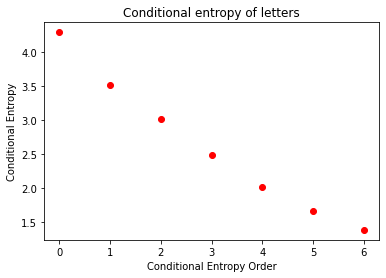

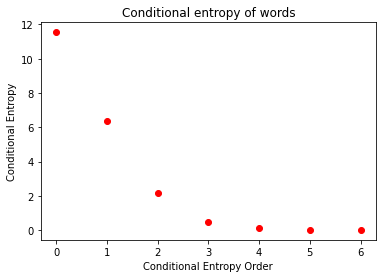


File name: norm_wiki_eo.txt
conditional_entropy_of_letters: [4.176788490262165, 3.340005253797392, 2.8718268762428503, 2.3926250776570264, 1.9915101282866439, 1.7090183254008777, 1.48726775550436]
conditional_entropy_of_words: [11.560529950245988, 6.5576792566557955, 2.484719598290749, 0.6336182904549443, 0.16165828758929832, 0.04690596393254471, 0.019293900156629847]


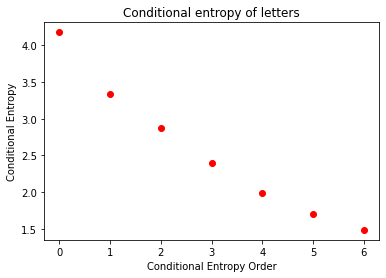

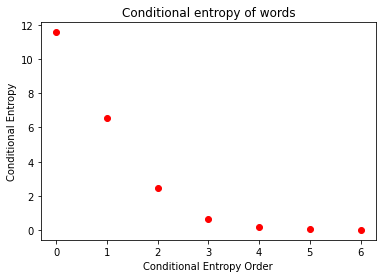


File name: norm_wiki_et.txt
conditional_entropy_of_letters: [4.169833224728488, 3.506958310134423, 3.1344062669673303, 2.6108658073128597, 2.1114424274106742, 1.7297213936153346, 1.4227339251786773]
conditional_entropy_of_words: [13.74624354508102, 5.424183898904879, 0.9047414819244088, 0.11619701011997018, 0.02364729988548377, 0.007509992883867676, 0.0029074371578430686]


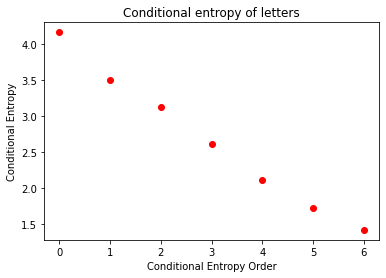

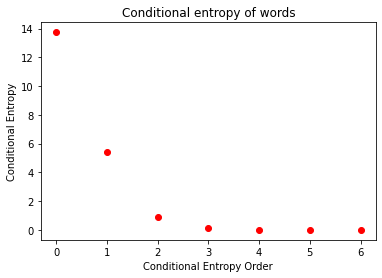


File name: norm_wiki_ht.txt
conditional_entropy_of_letters: [4.146385764101037, 3.1138607714802373, 2.2735251221458084, 1.4921527491425781, 1.0521435299646493, 0.7609355776785067, 0.5849168132577746]
conditional_entropy_of_words: [8.166919505028963, 3.1931145053383356, 1.3113269628663495, 0.8122283061617945, 0.6205735855268225, 0.5454075078554578, 0.47439853322002357]


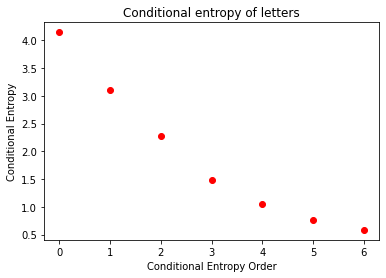

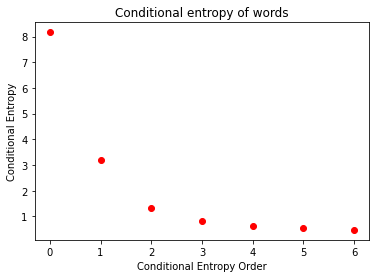


File name: norm_wiki_la.txt
conditional_entropy_of_letters: [4.228247465746815, 3.4501261536143852, 2.823492106530299, 2.1520314314204265, 1.6427638701364684, 1.3127475540533045, 1.0690515429717333]
conditional_entropy_of_words: [11.969194044376593, 4.400026106166727, 1.1668837096581777, 0.38803540854204, 0.20646889313686384, 0.1651081442920699, 0.1495902695761989]


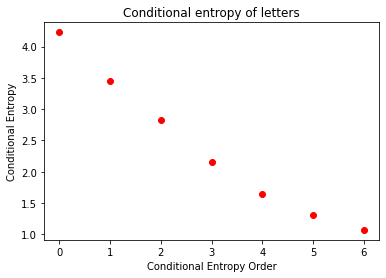

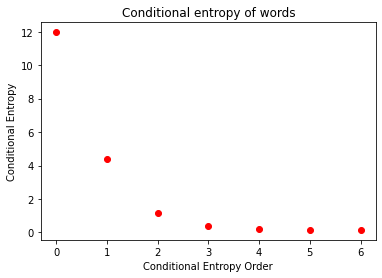


File name: norm_wiki_nv.txt
conditional_entropy_of_letters: [3.8749372588209434, 2.9472686229701526, 2.367581098166097, 1.7952643889941493, 1.3415979250332555, 1.0198459274444014, 0.8019912582319352]
conditional_entropy_of_words: [9.15401183079938, 3.8639409744048634, 1.7188136325870265, 0.899260834298287, 0.5385767433847521, 0.31385255872908907, 0.18828418492283583]


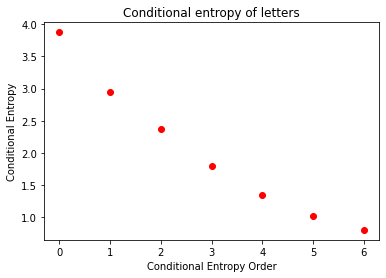

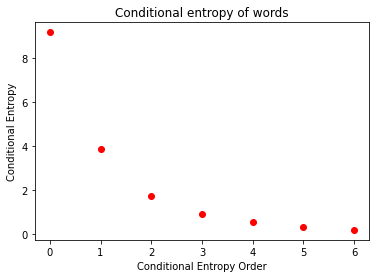


File name: norm_wiki_so.txt
conditional_entropy_of_letters: [4.040113860382521, 3.299566136299429, 2.844371887070636, 2.3743108553306143, 1.945032742557818, 1.5862752295297564, 1.2985444621425595]
conditional_entropy_of_words: [11.731104737240592, 5.398739370479995, 1.6086239389585326, 0.4096065365721172, 0.11661094741552007, 0.0395065212502926, 0.019553339076385578]


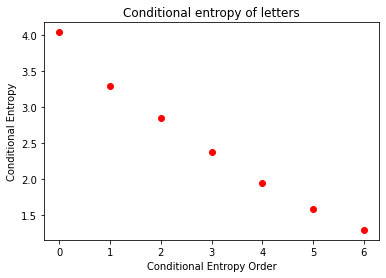

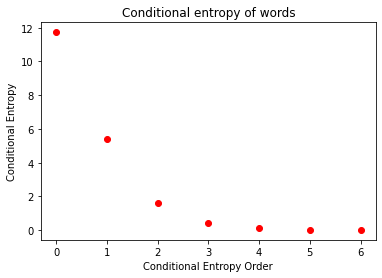

In [10]:
for path_to_file in os.listdir("wiki_data"):
    print("File name:", path_to_file)
    plot_and_calculate(max_order=6, path_to_file=path_to_file, file_folder="wiki_data")

File name: sample0.txt
conditional_entropy_of_letters: [4.273001240566635, 2.915894216262968, 2.0003594568493464, 1.5392820427984701, 1.4385819746138613, 1.391968639646847, 1.3028456966946877]
conditional_entropy_of_words: [7.748741386140134, 7.486392862851711, 4.406704594406155, 0.5950087061871917, 0.01206212769881263, 0.00010111418198626786, 3.2099766072954744e-06]


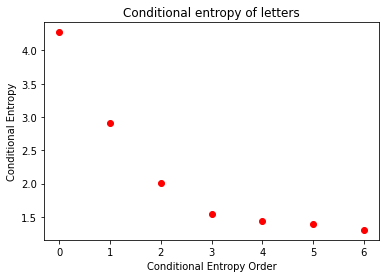

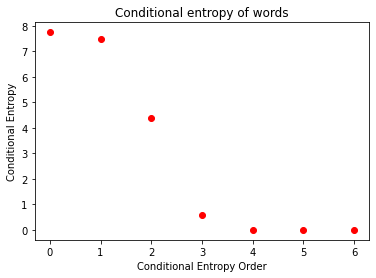


File name: sample1.txt
conditional_entropy_of_letters: [4.1270061355497205, 3.2391501954800406, 2.8612798881409267, 2.326684943904885, 1.8135102123783184, 1.4311247631559112, 1.1420030114491069]
conditional_entropy_of_words: [11.500698483655789, 5.372245318605185, 1.5747393031025305, 0.5075112949819727, 0.29345806693802967, 0.1505652785761798, 0.11672961361761387]


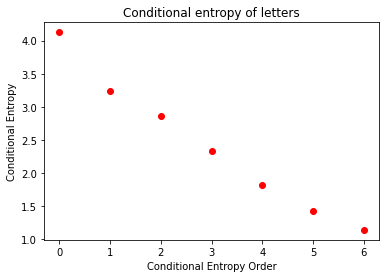

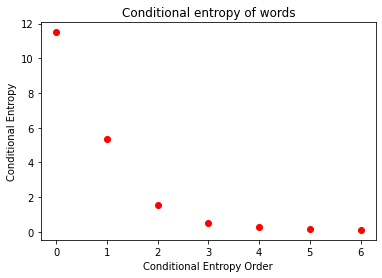


File name: sample2.txt
conditional_entropy_of_letters: [3.993311800232583, 3.050439544594745, 2.467660497553419, 1.939772587922451, 1.7020328355856251, 1.6144134514691229, 1.5398780947070807]
conditional_entropy_of_words: [8.023869815826416, 7.34862444868417, 3.781937332780256, 0.8595059631118873, 0.08199123582449071, 0.002987010033862657, 8.01393355914817e-05]


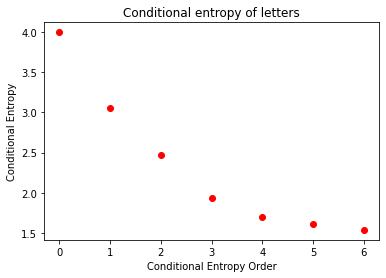

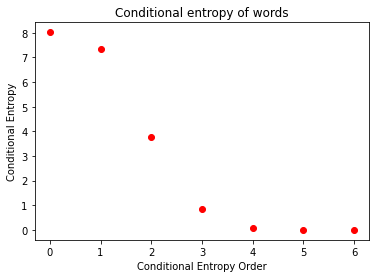


File name: sample3.txt
conditional_entropy_of_letters: [3.9302978341579875, 3.1844672773090807, 2.6278959197207907, 2.023991698764425, 1.5342435534779932, 1.2504137388100065, 1.0840537370076018]
conditional_entropy_of_words: [9.061119324677046, 5.950221966394711, 2.6308074182196752, 1.264091423924473, 0.41432739497180243, 0.2001232778310426, 0.11278446028462955]


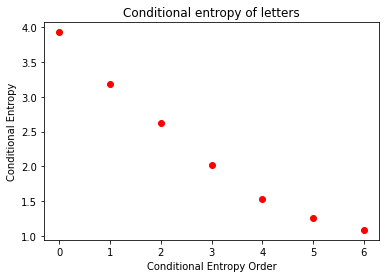

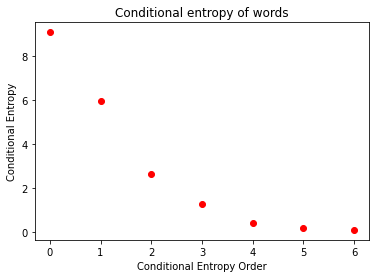


File name: sample4.txt
conditional_entropy_of_letters: [4.253809567379015, 4.229101526820833, 4.226829033749152, 4.178535244136844, 3.7661316118107164, 2.3905712499749527, 0.7084144930494675]
conditional_entropy_of_words: [17.129669110961736, 3.4442538962882017, 0.23407601703789896, 0.0032274276117648156, 7.608894145064654e-06, 0.0, 0.0]


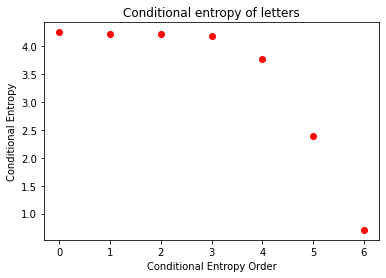

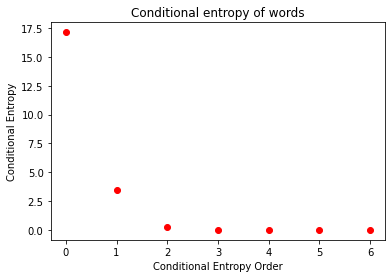


File name: sample5.txt
conditional_entropy_of_letters: [4.441688018481797, 3.523098231686726, 3.250620960249637, 2.8342715912186827, 2.172440895611472, 1.446867997291905, 0.8847413485070249]
conditional_entropy_of_words: [16.50952760746038, 9.356255905249237e-07, 9.356262173114714e-07, 9.356268440988589e-07, 9.356274708870862e-07, 9.356280976761533e-07, 9.356287244660601e-07]


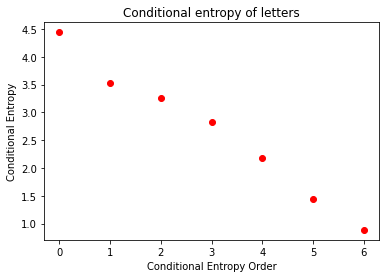

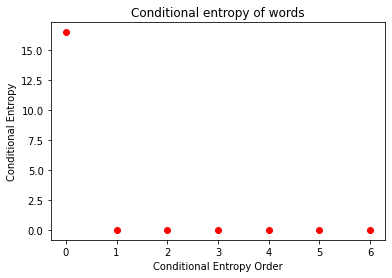

In [11]:
for path_to_file in os.listdir("sample_languages"):
    print("File name:", path_to_file)
    plot_and_calculate(max_order=6, path_to_file=path_to_file, file_folder="sample_languages")

0 - Probably is a natural language.
1 - Probably is a natural language.
2 - Is a natural language.
3 - Is a natural language.
4 - Shouldn't be a natural language. (Because of letter entropies) 
5 - Not a natural language. (sudden change of entropy value)
